<a href="https://colab.research.google.com/github/tejasprasadd/British-Airways-Analytics/blob/main/Customer_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I left for London from Johan...
1,✅ Trip Verified | After an excellent flight ...
2,✅ Trip Verified | On a recent flight from Cy...
3,✅ Trip Verified | Flight BA 0560 arrived in ...
4,✅ Trip Verified | This was the first time I ...


In [ ]:
df.to_csv("/content/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
# prompt: clean the data extracted above and put it into a file named data

# Load the dataframe
df = pd.read_csv('/content/BA_reviews.csv', index_col=0)

# Clean the data
def clean_text(text):
    text = text.replace("✅ Trip Verified | ", "")
    text = text.replace("Not Verified | ", "")
    return text

df['reviews'] = df['reviews'].apply(clean_text)
print("The text has been cleaned and stored in file Data.csv")

# Save to new file
df.to_csv('/content/Data.csv', index=False)
DF=pd.read_csv('/content/Data.csv')
DF.head()

The text has been cleaned and stored in file Data.csv


,reviews
0,I left for London from Johannesburg at 21:15 o...
1,After an excellent flight on a 777 CPT to LH...
2,On a recent flight from Cyprus BA621 on 23/1...
3,Flight BA 0560 arrived in Rome on 11 Decembe...
4,This was the first time I flew British Airwa...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mean Vector Shape: torch.Size([300])
Standard Deviation Vector Shape: torch.Size([300])


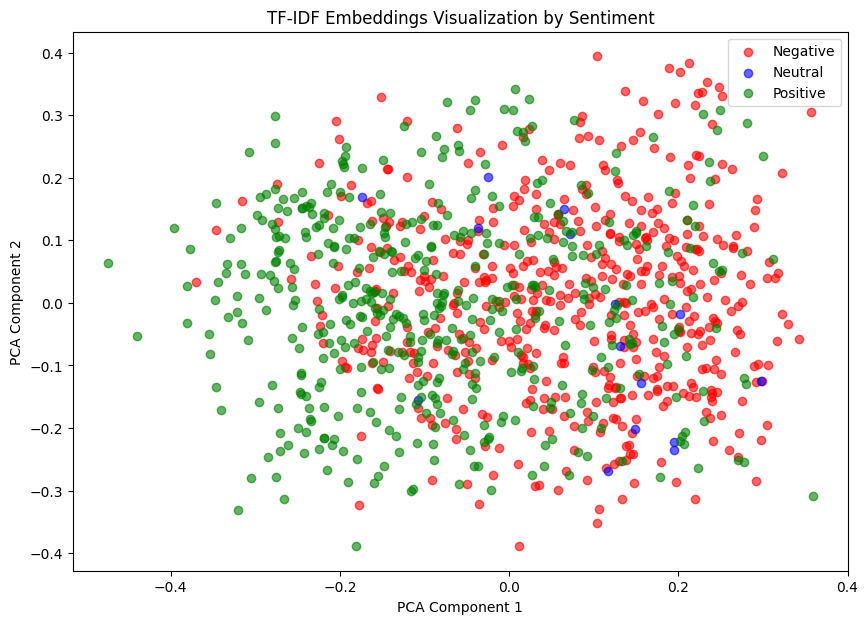

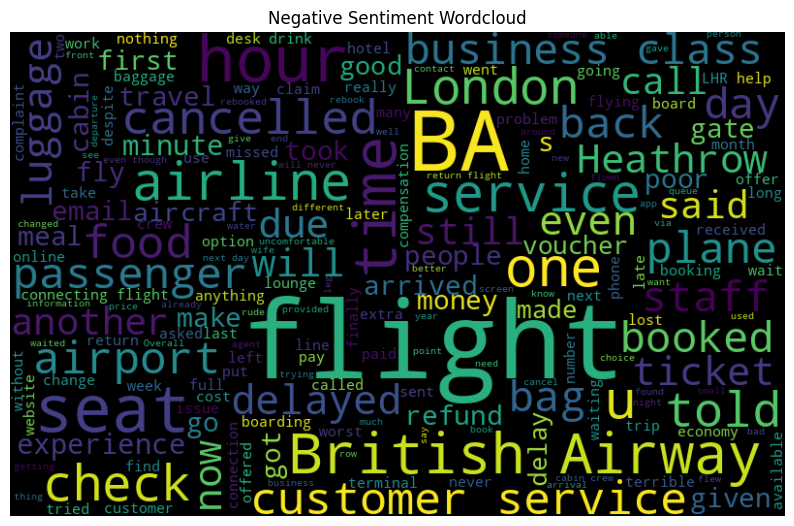

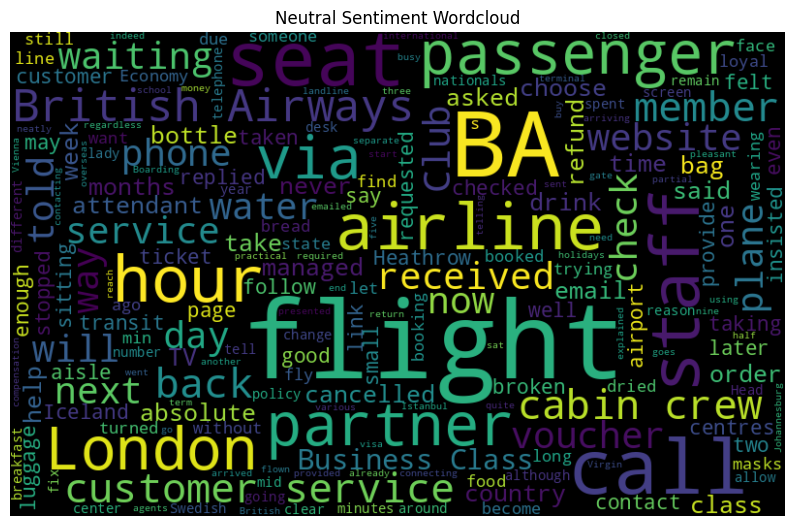

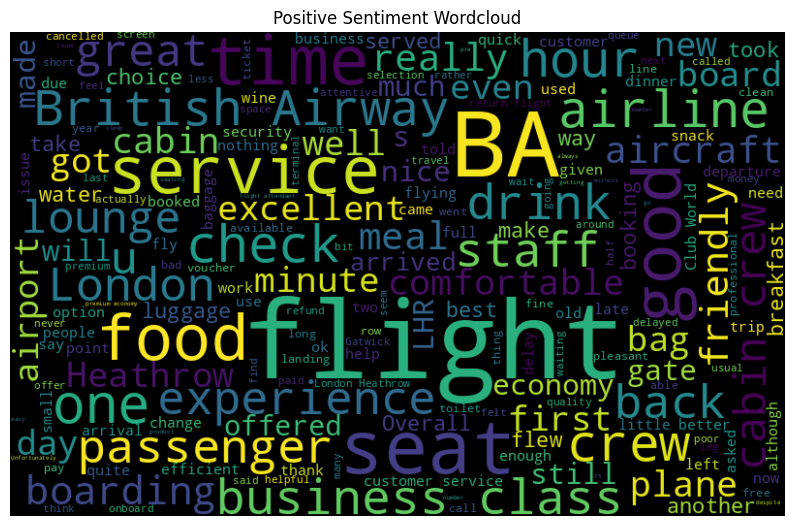

In [ ]:
# Import necessary libraries
import pandas as pd
import torch  # Import PyTorch for tensor operations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA  # For dimensionality reduction
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('/content/Data.csv')  # Replace with your file path
# Assumes the dataset contains a column named 'reviews'

# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['reviews'].apply(
    lambda review: analyzer.polarity_scores(review)
)
df['compound_sentiment'] = df['sentiment_scores'].apply(
    lambda score_dict: score_dict['compound']
)
df['sentiment'] = pd.cut(
    df['compound_sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'neutral', 'positive']
)

# Text to TF-IDF matrix for numerical representation
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # Use the top 300 features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews'])  # Generate the TF-IDF matrix

# Convert TF-IDF to PyTorch tensor
tfidf_tensor = torch.tensor(tfidf_matrix.toarray(), dtype=torch.float32)

# Perform basic PyTorch operations
mean_vector = torch.mean(tfidf_tensor, dim=0)  # Mean of all features
std_vector = torch.std(tfidf_tensor, dim=0)  # Standard deviation of all features
print("Mean Vector Shape:", mean_vector.shape)
print("Standard Deviation Vector Shape:", std_vector.shape)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
tfidf_reduced = pca.fit_transform(tfidf_tensor.numpy())

# Visualize the reduced TF-IDF embeddings with PyTorch
plt.figure(figsize=(10, 7))
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
for sentiment in colors.keys():
    indices = df['sentiment'] == sentiment
    plt.scatter(
        tfidf_reduced[indices, 0], tfidf_reduced[indices, 1],
        label=sentiment.capitalize(), color=colors[sentiment], alpha=0.6
    )
plt.title("TF-IDF Embeddings Visualization by Sentiment")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Generate a word cloud for each sentiment
for sentiment in ['negative', 'neutral', 'positive']:
    words = ' '.join(
        [text for text in df[df['sentiment'] == sentiment]['reviews']]
    )
    if words.strip():
        wordcloud = WordCloud(
            width=800, height=500, random_state=21, max_font_size=110, stopwords=STOPWORDS
        ).generate(words)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f"{sentiment.capitalize()} Sentiment Wordcloud")
        plt.show()
    else:
        print(f"Skipping wordcloud for {sentiment} sentiment - No relevant text found.")
